In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
final_df = pd.read_csv("final_final_possesion_df.csv")
team_ids = final_df['uniqueTeamId']

In [3]:
final_df

,uniqueTeamId,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,...,Side Pass_Zone_2 Ratio,Side Pass_Zone_3 Ratio,Backward Pass Ratio,Forward Pass Ratio,Side Pass Ratio,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity
0,10531---2499726,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,0.944785,...,0.230303,0.081818,0.157576,0.339394,0.503030,4.0,0.250000,0.250000,0.500000,6.294872
1,10531---2499736,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,0.909091,...,0.246231,0.140704,0.155779,0.304020,0.540201,7.0,0.428571,0.571429,0.000000,6.659341
2,10531---2499741,0.022989,0.105747,0.105747,0.765517,438,0.146119,0.842466,0.130435,0.853755,...,0.294521,0.043379,0.155251,0.349315,0.495434,6.0,0.166667,0.333333,0.500000,6.472527
3,10531---2499757,0.027344,0.103516,0.101562,0.767578,515,0.149515,0.829126,0.113744,0.867299,...,0.205825,0.133981,0.163107,0.333981,0.502913,8.0,0.000000,0.625000,0.375000,7.153846
4,10531---2499766,0.032258,0.101382,0.105991,0.760369,220,0.240909,0.750000,0.134615,0.846154,...,0.154545,0.077273,0.168182,0.450000,0.381818,3.0,0.000000,0.666667,0.333333,5.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,756---2565880,0.029213,0.110112,0.112360,0.748315,448,0.214286,0.765625,0.122449,0.867347,...,0.223214,0.165179,0.138393,0.314732,0.546875,19.0,0.210526,0.421053,0.368421,6.615385
3648,756---2565892,0.036842,0.113158,0.105263,0.744737,383,0.177546,0.812010,0.112299,0.871658,...,0.240209,0.125326,0.140992,0.352480,0.506527,11.0,0.545455,0.272727,0.181818,7.362637
3649,756---2565904,0.031496,0.089239,0.089239,0.790026,384,0.270833,0.713542,0.135338,0.849624,...,0.148438,0.111979,0.179688,0.346354,0.473958,14.0,0.000000,0.642857,0.357143,8.089744
3650,756---2565908,0.053608,0.098969,0.107216,0.740206,488,0.180328,0.805328,0.128631,0.854772,...,0.221311,0.131148,0.172131,0.331967,0.495902,12.0,0.333333,0.500000,0.166667,7.153846


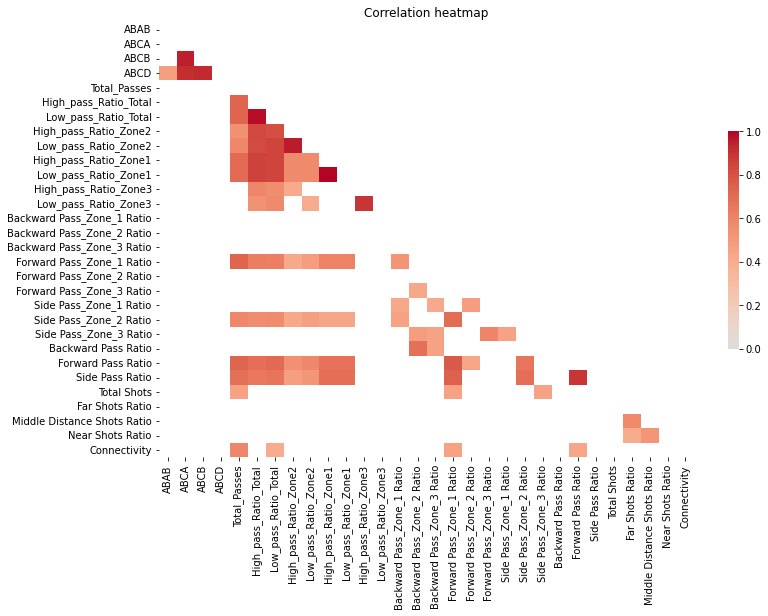

In [298]:
corr = final_df.drop(["uniqueTeamId"], axis = 1).corr().abs()
corr[corr.abs() < 0.4] = np.nan

plt.figure(figsize=(12, 8))
sns.heatmap(corr.abs(), cmap="coolwarm", 
            mask=np.triu(np.ones_like(corr.abs(), dtype=bool)),
            cbar_kws={"shrink": .5}, vmin=0, vmax=1, center= 0)
plt.title('Correlation heatmap')
plt.show()

In [232]:
final_df.set_index("uniqueTeamId", inplace = True)

In [12]:
#there are only 12 nan values.
final_df.isna().sum()

ABAB                           0
ABCA                           0
ABCB                           0
ABCD                           0
Total_Passes                   0
High_pass_Ratio_Total          0
Low_pass_Ratio_Total           0
High_pass_Ratio_Zone2          0
Low_pass_Ratio_Zone2           0
High_pass_Ratio_Zone1          0
Low_pass_Ratio_Zone1           0
High_pass_Ratio_Zone3          0
Low_pass_Ratio_Zone3           0
Backward Pass_Zone_1 Ratio     0
Backward Pass_Zone_2 Ratio     0
Backward Pass_Zone_3 Ratio     0
Forward Pass_Zone_1 Ratio      0
Forward Pass_Zone_2 Ratio      0
Forward Pass_Zone_3 Ratio      0
Side Pass_Zone_1 Ratio         0
Side Pass_Zone_2 Ratio         0
Side Pass_Zone_3 Ratio         0
Backward Pass Ratio            0
Forward Pass Ratio             0
Side Pass Ratio                0
Total Shots                    3
Far Shots Ratio                3
Middle Distance Shots Ratio    3
Near Shots Ratio               3
Connectivity                   0
dtype: int

In [13]:
final_df.fillna(0, inplace=True)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# 1. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)
# Note: PCA's n_components set to 0.9 means PCA will select the minimum number of components such that at least 90% of the variance is retained.

In [15]:
scaled_data

array([[ 0.42402975, -0.08278974, -0.3261066 , ..., -1.13661627,
         1.55117174, -1.10151684],
       [ 0.91060298,  0.89423175,  0.67822352, ...,  0.75104005,
        -1.7365122 , -0.75460857],
       [-0.97912152,  0.85524817,  0.80779219, ..., -0.64722389,
         1.55117174, -0.93242085],
       ...,
       [-0.26715757, -0.25053488, -0.28930067, ...,  1.17051923,
         0.61183347,  0.60687568],
       [ 1.58332402,  0.40123013,  0.90544218, ...,  0.33156087,
        -0.64061756, -0.28392899],
       [-0.35735542, -1.13426325, -0.91339526, ...,  0.33156087,
        -0.09267023, -0.71102712]])

In [41]:
# 2. Apply PCA
pca = PCA(n_components=2) 
final_df_scaled = pca.fit_transform(scaled_data)

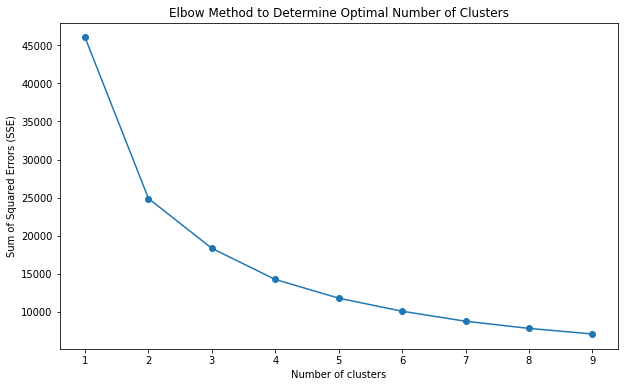

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 10) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(final_df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

k = 4

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(final_df_scaled)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, random_state=0)  
gmm_clusters = gmm.fit_predict(final_df_scaled)

# Applying Bisecting K-Means Clustering
bkmeans = BisectingKMeans(n_clusters=k, random_state=0)
bkmeans_labels = bkmeans.fit_predict(final_df_scaled)

# Creating a DataFrame to see the cluster labels alongside team IDs
clustered_teams = pd.DataFrame({'TeamID': team_ids, 'KMeans_Labels': kmeans_labels, 'GMM_Labels': gmm_clusters, 'BKMeans_Labels': bkmeans_labels})

In [48]:
from sklearn.metrics import silhouette_score

# Calculating the average silhouette score for KMeans clustering
silhouette_avg_kmeans = silhouette_score(final_df_scaled, kmeans_labels)
print(f"Average Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans:.3f}")

# Calculating the average silhouette score for Gaussian Mixture Model clustering
silhouette_avg_gmm = silhouette_score(final_df_scaled, gmm_clusters)
print(f"Average Silhouette Score for Gaussian Mixture Model Clustering: {silhouette_avg_gmm:.3f}")

# Calculating the average silhouette score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(final_df_scaled, bkmeans_labels)
print(f"Average Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Average Silhouette Score for KMeans Clustering: 0.333
Average Silhouette Score for Gaussian Mixture Model Clustering: 0.329
Average Silhouette Score for Hierarchical Clustering: 0.287


In [56]:
k_clustered_teams = clustered_teams.drop(columns=['GMM_Labels', 'BKMeans_Labels'])
df_with_clusters = final_df.merge(k_clustered_teams, left_on='uniqueTeamId', right_on='TeamID')
df_with_clusters["matchId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[1].astype(int)
df_with_clusters["teamId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[0].astype(int)
df_with_clusters = df_with_clusters.drop([col for col in df_with_clusters.columns if "ID" in col or "Id" in col], axis=1)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = df_with_clusters

# Split the DataFrame into features (X) and the target variable (y)
X = df.drop('KMeans_Labels', axis=1)
y = df['KMeans_Labels']

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store the evaluation metrics of each model
evaluation_metrics = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    evaluation_metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

evaluation_metrics

{'Logistic Regression': {'Accuracy': 0.9863201094391245,
  'Precision': 0.9863762579300288,
  'Recall': 0.9863201094391245,
  'F1 Score': 0.9863286127938418},
 'Support Vector Machine': {'Accuracy': 0.9534883720930233,
  'Precision': 0.9537912782848711,
  'Recall': 0.9534883720930233,
  'F1 Score': 0.9533108188853923},
 'Random Forest': {'Accuracy': 0.9015047879616963,
  'Precision': 0.9014688023933375,
  'Recall': 0.9015047879616963,
  'F1 Score': 0.9012918848009102},
 'K-Nearest Neighbors': {'Accuracy': 0.86593707250342,
  'Precision': 0.8689069125629347,
  'Recall': 0.86593707250342,
  'F1 Score': 0.8658361392451831}}

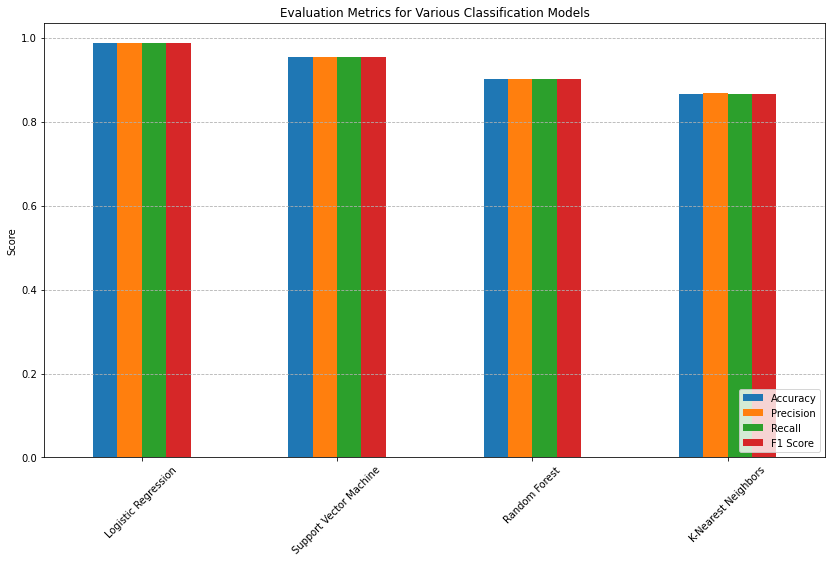

In [59]:
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plotting
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Evaluation Metrics for Various Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(loc='lower right')
plt.show()


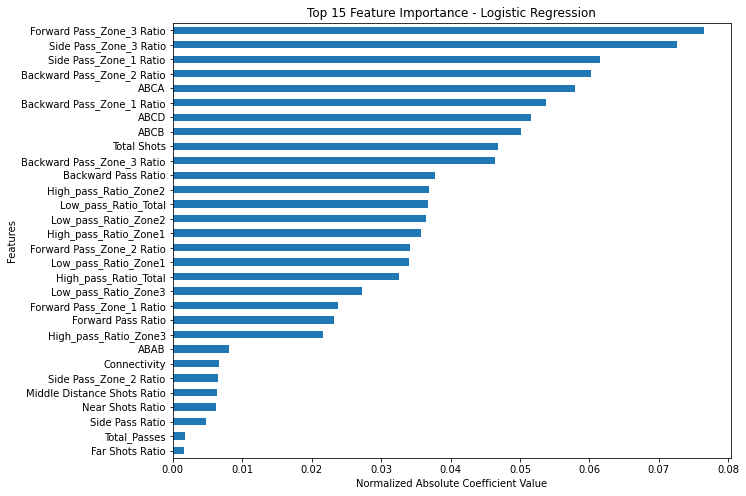

In [62]:
# Preprocessing steps
X = df.drop('KMeans_Labels', axis=1)
y = df['KMeans_Labels']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Extract the coefficients
coefficients = logistic_model.coef_[0]

# Take the absolute value of the coefficients and normalize
abs_coefficients = np.abs(coefficients)
normalized_coefficients = abs_coefficients / abs_coefficients.sum()

# Map normalized coefficients to feature names
feature_importance = pd.Series(normalized_coefficients, index=X.columns)

# Sorting the features by importance and selecting the top 15
top_15_features = feature_importance.sort_values(ascending=False).head(15)

# Plotting the top 15 features
plt.figure(figsize=(10, 8))
feature_importance.sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importance - Logistic Regression')
plt.xlabel('Normalized Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()

In [432]:
top10 = list(dict(feature_importance.sort_values(ascending=False).head(10)).keys())
selected_features_df = final_df.loc[:, top10]
selected_features_df.fillna(0, inplace=True)


###
selected_features_df = final_df.copy()

In [436]:
scaler = StandardScaler()
selected_features_df.fillna(0, inplace=True)
scaled_data = scaler.fit_transform(selected_features_df.iloc[:,1:])

pca = PCA(n_components=2)
final_df_scaled = pca.fit_transform(scaled_data)

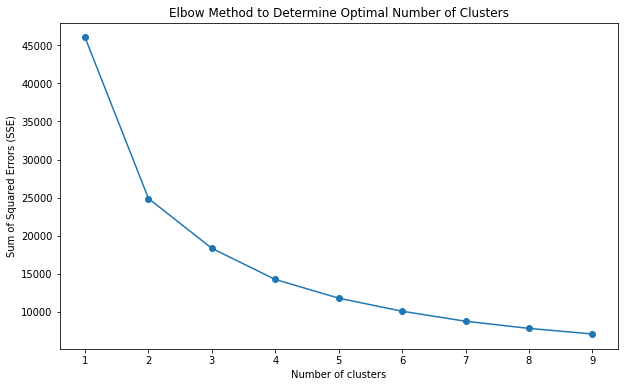

In [236]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 10) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(final_df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()


In [352]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

k = 3

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(final_df_scaled)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, random_state=0)  
gmm_clusters = gmm.fit_predict(final_df_scaled)

# Applying Bisecting K-Means Clustering
bkmeans = BisectingKMeans(n_clusters=k, random_state=0)
bkmeans_labels = bkmeans.fit_predict(final_df_scaled)

# Creating a DataFrame to see the cluster labels alongside team IDs
clustered_teams = pd.DataFrame({'TeamID': team_ids, 'KMeans_Labels': kmeans_labels, 'GMM_Labels': gmm_clusters, 'BKMeans_Labels': bkmeans_labels})

In [353]:
from sklearn.metrics import silhouette_score

# Calculating the average silhouette score for KMeans clustering
silhouette_avg_kmeans = silhouette_score(final_df_scaled, kmeans_labels)
print(f"Average Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans:.3f}")

# Calculating the average silhouette score for Gaussian Mixture Model clustering
silhouette_avg_gmm = silhouette_score(final_df_scaled, gmm_clusters)
print(f"Average Silhouette Score for Gaussian Mixture Model Clustering: {silhouette_avg_gmm:.3f}")

# Calculating the average silhouette score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(final_df_scaled, bkmeans_labels)
print(f"Average Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Average Silhouette Score for KMeans Clustering: 0.328
Average Silhouette Score for Gaussian Mixture Model Clustering: 0.326
Average Silhouette Score for Hierarchical Clustering: 0.307


In [109]:
with open("../matches/matches_England.json", "r") as file:
    matches_data_2 = json.load(file)

matches2 = pd.DataFrame(matches_data_2)

with open("../matches/matches_France.json", "r") as file:
    matches_data_3 = json.load(file)

matches3 = pd.DataFrame(matches_data_3)

with open("../matches/matches_Germany.json", "r") as file:
    matches_data_4 = json.load(file)

matches4 = pd.DataFrame(matches_data_4)

with open("../matches/matches_Italy.json", "r") as file:
    matches_data_5 = json.load(file)

matches5 = pd.DataFrame(matches_data_5)

with open("../matches/matches_Spain.json", "r") as file:
    matches_data_6 = json.load(file)

matches6 = pd.DataFrame(matches_data_6)

all_matches_df = pd.concat([matches2, matches3, matches4, matches5, matches6], ignore_index=True)

with open("../events/teams.json", "r") as file:
    teams_data = json.load(file)

teams_df = pd.DataFrame(teams_data)

In [354]:
final_df = final_df.reset_index()
df_with_clusters = final_df.merge(clustered_teams, left_on='uniqueTeamId', right_on='TeamID')
df_with_clusters["matchId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[1].astype(int)
df_with_clusters["teamId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[0].astype(int)

In [355]:
matches_with_clusters = df_with_clusters.merge(all_matches_df, left_on='matchId', right_on='wyId')

In [356]:
matches_with_clusters['Match_Result'] = matches_with_clusters.apply(
    lambda row: 'Draw' if row['winner'] == 0 else ('Win' if row['winner'] == row['teamId'] else 'Lose'), axis=1)

# Group by cluster label and match result
outcome_counts = matches_with_clusters.groupby(['KMeans_Labels', 'Match_Result']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

In [357]:
outcome_percentages

Match_Result,Draw,Lose,Win
KMeans_Labels,,,
0,22.356215,29.684601,47.959184
1,28.471002,39.455185,32.073814
2,23.885794,41.991643,34.122563


In [358]:
# Map each team to its cluster
team_to_cluster_map = dict(zip(clustered_teams['TeamID'], clustered_teams['KMeans_Labels']))

# Create a function to get opponent cluster
def get_opponent_cluster(row):
    for team in row['teamsData']:
        if int(team) != int(row['teamId']):
            t = str(team)
            m = str(row['matchId'])
            g = t + "---" + m
            return team_to_cluster_map.get(g)
    

matches_with_clusters['Opponent_Cluster'] = matches_with_clusters.apply(get_opponent_cluster, axis=1)

In [359]:
# Grouping by cluster and opponent cluster
grouped = matches_with_clusters.groupby(['KMeans_Labels', 'Opponent_Cluster', 'Match_Result'])

# Counting occurrences
outcome_counts = grouped.size().unstack(fill_value=0)

# Calculating percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Reshaping for a 9x3 matrix
outcome_matrix = outcome_percentages.unstack()

In [360]:
outcome_matrix

Match_Result           Draw                             Lose             \
Opponent_Cluster          0          1          2          0          1   
KMeans_Labels                                                             
0                 18.461538  23.167849  22.666667  40.769231  30.023641   
1                 23.167849  34.806630  28.328612  46.808511  32.596685   
2                 22.666667  28.328612  22.222222  50.666667  33.994334   

Match_Result                       Win                        
Opponent_Cluster          2          0          1          2  
KMeans_Labels                                                 
0                 26.666667  40.769231  46.808511  50.666667  
1                 37.677054  30.023641  32.596685  33.994334  
2                 38.888889  26.666667  37.677054  38.888889

# ÇOĞUNLUK OYLMASI YAP

In [248]:
matches_with_clusters.columns

Index(['uniqueTeamId', 'ABAB', 'ABCA', 'ABCB', 'ABCD', 'Total_Passes',
       'High_pass_Ratio_Total', 'Low_pass_Ratio_Total',
       'High_pass_Ratio_Zone2', 'Low_pass_Ratio_Zone2',
       'High_pass_Ratio_Zone1', 'Low_pass_Ratio_Zone1',
       'High_pass_Ratio_Zone3', 'Low_pass_Ratio_Zone3',
       'Backward Pass_Zone_1 Ratio', 'Backward Pass_Zone_2 Ratio',
       'Backward Pass_Zone_3 Ratio', 'Forward Pass_Zone_1 Ratio',
       'Forward Pass_Zone_2 Ratio', 'Forward Pass_Zone_3 Ratio',
       'Side Pass_Zone_1 Ratio', 'Side Pass_Zone_2 Ratio',
       'Side Pass_Zone_3 Ratio', 'Backward Pass Ratio', 'Forward Pass Ratio',
       'Side Pass Ratio', 'Total Shots', 'Far Shots Ratio',
       'Middle Distance Shots Ratio', 'Near Shots Ratio', 'Connectivity',
       'TeamID', 'KMeans_Labels', 'GMM_Labels', 'BKMeans_Labels', 'matchId',
       'teamId', 'status', 'roundId', 'gameweek', 'teamsData', 'seasonId',
       'dateutc', 'winner', 'venue', 'wyId', 'label', 'date', 'referees',
       'du

In [249]:
matches_with_clusters

,uniqueTeamId,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,...,winner,venue,wyId,label,date,referees,duration,competitionId,Match_Result,Opponent_Cluster
0,10531---2499726,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,0.944785,...,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Draw,3
1,1619---2499726,0.039683,0.081349,0.085317,0.793651,507,0.136095,0.838264,0.065217,0.930435,...,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Draw,0
2,10531---2499736,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,0.909091,...,1611,Liberty Stadium,2499736,"Swansea City - Manchester United, 0 - 4","August 19, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Lose,3
3,1611---2499736,0.054577,0.093310,0.100352,0.751761,571,0.084063,0.894921,0.055882,0.938235,...,1611,Liberty Stadium,2499736,"Swansea City - Manchester United, 0 - 4","August 19, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Win,0
4,10531---2499741,0.022989,0.105747,0.105747,0.765517,438,0.146119,0.842466,0.130435,0.853755,...,10531,Selhurst Park,2499741,"Crystal Palace - Swansea City, 0 - 2","August 26, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385911, 'role': 'referee'}, {'r...",Regular,364,Win,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,714---2565792,0.017544,0.093567,0.099415,0.789474,345,0.176812,0.808696,0.155172,0.827586,...,0,Estadio Municipal de Butarque,2565792,"Legan\u00e9s - Las Palmas, 0 - 0","February 24, 2018 at 6:30:00 PM GMT+1","[{'refereeId': 381854, 'role': 'referee'}, {'r...",Regular,795,Draw,1
3648,714---2565728,0.039326,0.109551,0.112360,0.738764,359,0.144847,0.816156,0.083700,0.889868,...,756,Estadi Municipal de Montilivi,2565728,"Girona - Las Palmas, 6 - 0","January 13, 2018 at 1:00:00 PM GMT+1","[{'refereeId': 420995, 'role': 'referee'}, {'r...",Regular,795,Lose,1
3649,756---2565728,0.016194,0.105263,0.109312,0.769231,250,0.204000,0.760000,0.084906,0.877358,...,756,Estadi Municipal de Montilivi,2565728,"Girona - Las Palmas, 6 - 0","January 13, 2018 at 1:00:00 PM GMT+1","[{'refereeId': 420995, 'role': 'referee'}, {'r...",Regular,795,Win,0
3650,714---2565923,0.026258,0.094092,0.096280,0.783370,460,0.132609,0.843478,0.058559,0.918919,...,756,Estadio de Gran Canaria,2565923,"Las Palmas - Girona, 1 - 2","May 19, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 381854, 'role': 'referee'}, {'r...",Regular,795,Lose,1


In [250]:
clustered_teams

,TeamID,KMeans_Labels,GMM_Labels,BKMeans_Labels
0,10531---2499726,0,2,3
1,10531---2499736,0,2,3
2,10531---2499741,0,2,3
3,10531---2499757,0,2,3
4,10531---2499766,1,1,0
...,...,...,...,...
3647,756---2565880,2,0,1
3648,756---2565892,0,2,1
3649,756---2565904,1,1,0
3650,756---2565908,2,0,1


In [361]:
clustered_teams_with_names = matches_with_clusters.merge(teams_df, left_on='teamId', right_on='wyId')

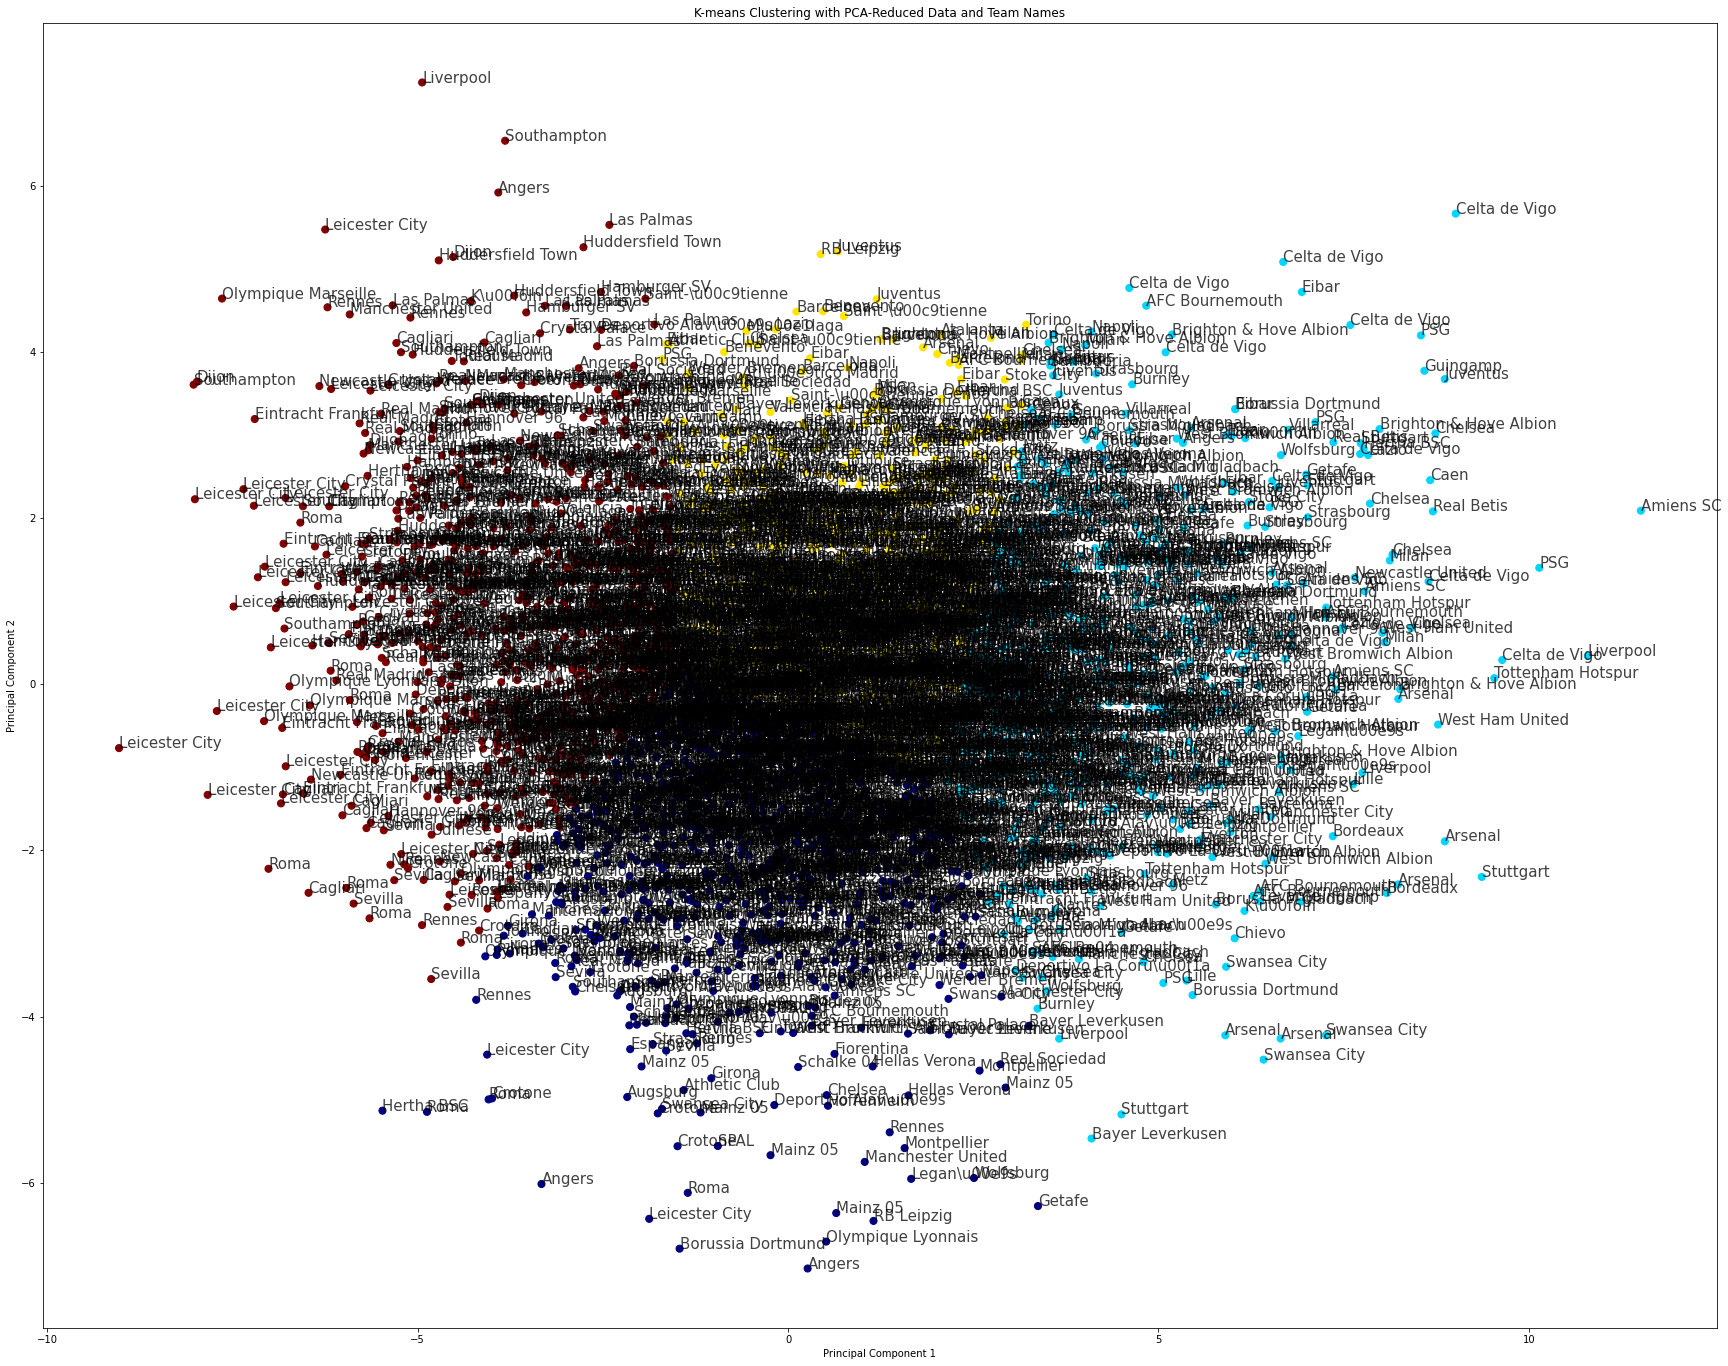

In [252]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(final_df_scaled)

# Create the scatter plot
plt.figure(figsize=(30, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, s=50, cmap='jet')

# Annotate each point with the team name
for i, team_name in enumerate(clustered_teams_with_names['name']):
    plt.annotate(team_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=15, alpha=0.75)

# Adding title and labels
plt.title('K-means Clustering with PCA-Reduced Data and Team Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [362]:
labeled_team_df = matches_with_clusters.loc[:,['uniqueTeamId', 'matchId', 'teamId', 'KMeans_Labels']]

In [363]:
labeled_team_df

,uniqueTeamId,matchId,teamId,KMeans_Labels
0,10531---2499726,2499726,10531,2
1,1619---2499726,2499726,1619,0
2,10531---2499736,2499736,10531,2
3,1611---2499736,2499736,1611,0
4,10531---2499741,2499741,10531,2
...,...,...,...,...
3647,714---2565792,2565792,714,2
3648,714---2565728,2565728,714,2
3649,756---2565728,2565728,756,1
3650,714---2565923,2565923,714,2


In [405]:
unique, counts = np.unique(labeled_team_df.KMeans_Labels, return_counts=True)
dict(zip(unique, counts))

{0: 1078, 1: 1138, 2: 1436}

In [365]:
majority_voting_res

KMeans_Labels,teamId,0,1,2,3,max_label,max_label_prob
0,674,0.394737,0.236842,0.210526,0.157895,0,0.394737
1,675,0.131579,0.605263,0.210526,0.052632,1,0.605263
2,676,0.157895,0.552632,0.184211,0.105263,1,0.552632
3,677,0.263158,0.315789,0.236842,0.184211,1,0.315789
4,678,0.342105,0.289474,0.263158,0.105263,0,0.342105
...,...,...,...,...,...,...,...
93,3795,0.421053,0.157895,0.184211,0.236842,0,0.421053
94,3799,0.236842,0.210526,0.289474,0.263158,2,0.289474
95,3804,0.236842,0.052632,0.210526,0.500000,3,0.500000
96,10531,0.078947,0.157895,0.342105,0.421053,3,0.421053


In [396]:
sorted(labeled_team_df['KMeans_Labels'].unique())

[0, 1, 2]

In [400]:
# Step 1: Aggregate data by 'teamId' and 'KMeans_Labels' and count occurrences
label_counts = labeled_team_df.groupby(['teamId', 'KMeans_Labels']).size().reset_index(name='counts')

# Step 2: Calculate probability of each label for each team
total_counts = labeled_team_df['teamId'].value_counts().reset_index()
total_counts.columns = ['teamId', 'total']

# Merge counts with total counts to calculate probabilities
label_prob = pd.merge(label_counts, total_counts, on='teamId')
label_prob['probability'] = label_prob['counts'] / label_prob['total']

# Pivot the data to have labels as columns
prob_pivot = label_prob.pivot(index='teamId', columns='KMeans_Labels', values='probability').fillna(0)

prob_pivot['max_label'] = prob_pivot.iloc[:, :-1].idxmax(axis=1)


# Ensuring all labels are represented
all_labels = sorted(labeled_team_df['KMeans_Labels'].unique())
for label in all_labels:
    if label not in prob_pivot.columns:
        prob_pivot[label] = 0  # Add missing label columns with 0 probability

# Now, recalculate max_label
prob_pivot['max_label'] = prob_pivot[all_labels].idxmax(axis=1)

# The updated DataFrame prob_pivot should now correctly reflect the max_label including label '3'
majority_voting_res = prob_pivot

majority_voting_res = majority_voting_res.reset_index()

In [401]:
majority_voting_res

KMeans_Labels,teamId,0,1,2,max_label
0,674,0.421053,0.131579,0.447368,2
1,675,0.868421,0.000000,0.131579,0
2,676,0.868421,0.000000,0.131579,0
3,677,0.210526,0.368421,0.421053,2
4,678,0.105263,0.394737,0.500000,2
...,...,...,...,...,...
93,3795,0.131579,0.394737,0.473684,2
94,3799,0.184211,0.342105,0.473684,2
95,3804,0.078947,0.263158,0.657895,2
96,10531,0.184211,0.184211,0.631579,2


In [403]:
def extract_value(row):
        # Check if the index is within the valid range for the DataFrame columns
        if row['max_label'] < 0 or row['max_label'] >= len(majority_voting_res.columns):
            raise IndexError(f"Index {row['max_label']} out of bounds for column lookup.")
        
        val = row["max_label"]
        return row[val]

majority_voting_res['max_label_prob'] = majority_voting_res.apply(extract_value, axis=1)

In [404]:
majority_voting_res

KMeans_Labels,teamId,0,1,2,max_label,max_label_prob
0,674,0.421053,0.131579,0.447368,2,0.447368
1,675,0.868421,0.000000,0.131579,0,0.868421
2,676,0.868421,0.000000,0.131579,0,0.868421
3,677,0.210526,0.368421,0.421053,2,0.421053
4,678,0.105263,0.394737,0.500000,2,0.500000
...,...,...,...,...,...,...
93,3795,0.131579,0.394737,0.473684,2,0.473684
94,3799,0.184211,0.342105,0.473684,2,0.473684
95,3804,0.078947,0.263158,0.657895,2,0.657895
96,10531,0.184211,0.184211,0.631579,2,0.631579


In [408]:
unique, counts = np.unique(majority_voting_res.max_label, return_counts=True)
dict(zip(unique, counts))

{0: 26, 1: 33, 2: 39}

In [482]:
np.quantile(majority_voting_res.max_label_prob, .3)

0.5

In [483]:
filtered_major = majority_voting_res[majority_voting_res['max_label_prob']>= .5]

In [484]:
teams_df = teams_df.loc[:,["wyId", "name"]]

merged_df_tmp = pd.merge(majority_voting_res, teams_df, left_on='teamId', right_on='wyId', how='left')

# Selecting the columns to include in the final DataFrame (if needed to remove the ID from df2)
majority_voting_res_named = merged_df_tmp.drop(columns=['wyId'])

In [485]:
team_ids

0       10531---2499726
1       10531---2499736
2       10531---2499741
3       10531---2499757
4       10531---2499766
             ...       
3647      756---2565880
3648      756---2565892
3649      756---2565904
3650      756---2565908
3651      756---2565923
Name: uniqueTeamId, Length: 3652, dtype: object

In [486]:
#selected_features_df["uniqueTeamId"] = team_ids
#selected_features_df = selected_features_df.reset_index()
selected_features_df['teamId'] = team_ids.apply(lambda x: x.split("---")[0])

In [487]:
filtered_major

KMeans_Labels,teamId,0,1,2,max_label,max_label_prob
1,675,0.868421,0.000000,0.131579,0,0.868421
2,676,0.868421,0.000000,0.131579,0,0.868421
4,678,0.105263,0.394737,0.500000,2,0.500000
5,679,0.421053,0.026316,0.552632,2,0.552632
6,680,0.500000,0.052632,0.447368,0,0.500000
...,...,...,...,...,...,...
88,3782,0.289474,0.105263,0.605263,2,0.605263
89,3783,0.026316,0.657895,0.315789,1,0.657895
92,3789,0.026316,0.500000,0.473684,1,0.500000
95,3804,0.078947,0.263158,0.657895,2,0.657895


In [488]:
grouped_mean_df = selected_features_df.groupby('teamId').mean().reset_index()
grouped_mean_df.teamId = grouped_mean_df.teamId.astype(int)
team_name_n_label_df = majority_voting_res_named.loc[:,["teamId", "name", "max_label"]]
grouped_mean_df = grouped_mean_df.merge(team_name_n_label_df)
grouped_mean_df = pd.merge(grouped_mean_df, filtered_major, on='teamId', how='inner')


names = grouped_mean_df.name
labels = grouped_mean_df.max_label_x

grouped_mean_df = grouped_mean_df.iloc[:,1:31]

In [489]:
scaled_data

array([[-0.33584016,  1.02065691,  0.87421454, ...,  0.78253663,
         0.41497997, -0.4945786 ],
       [-0.25586662,  1.36602755,  1.20283736, ...,  0.80786915,
        -0.77735722,  1.34677276],
       [-0.01579674, -0.02264482, -0.12391377, ..., -1.29598835,
         1.02709132,  0.81180372],
       ...,
       [-0.84416218, -0.80789279, -0.96107584, ..., -0.28954683,
         0.46391402, -1.25246897],
       [-1.20905907,  0.5505919 ,  0.52808498, ..., -1.18115641,
         0.53618977,  0.99836138],
       [ 0.18046492,  0.79043335,  0.80603038, ...,  0.23834565,
         0.25712373, -1.12445126]])

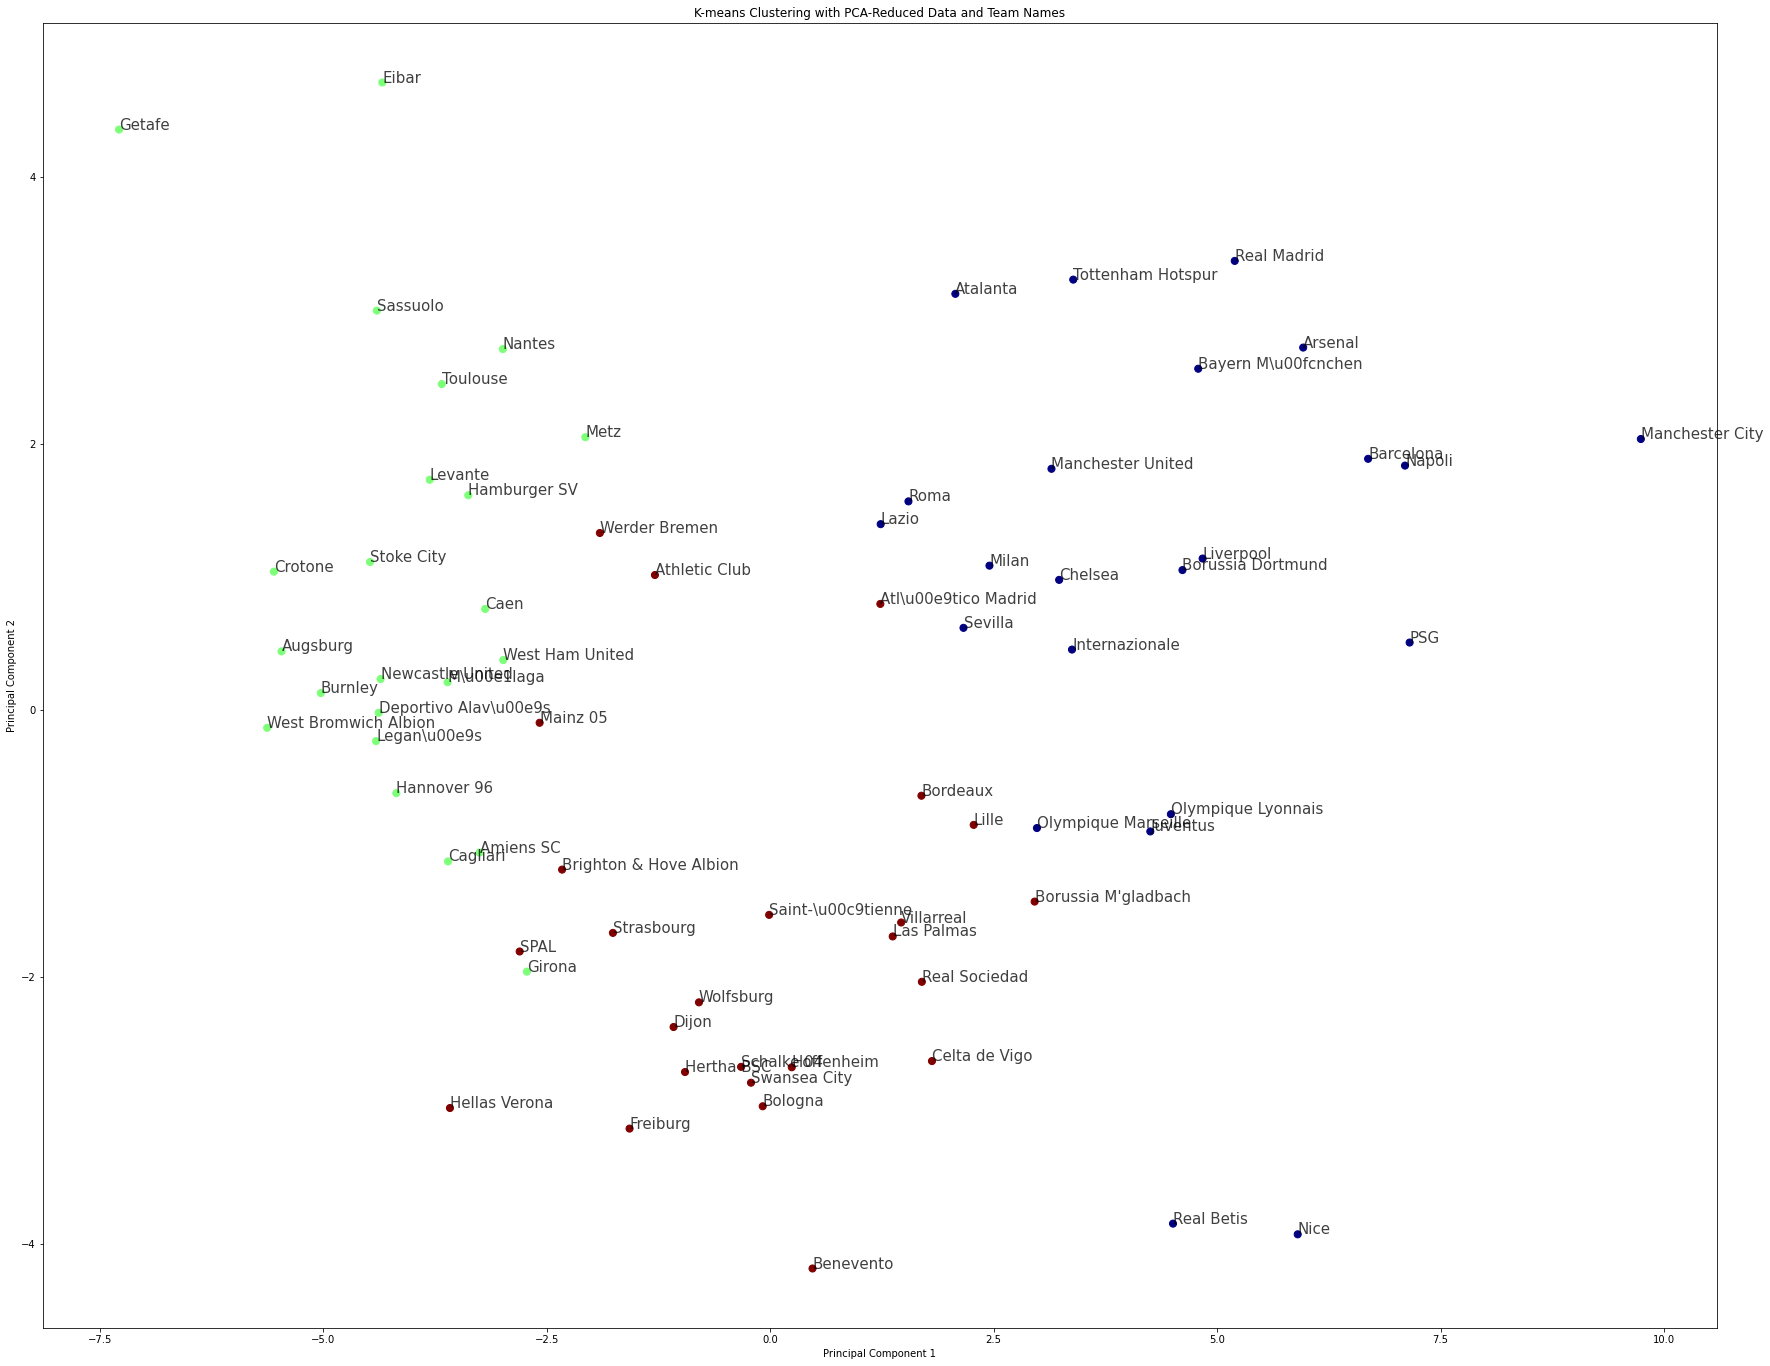

Loadings:
                                   PC1       PC2
ABAB                         0.021132 -0.093207
ABCA                         0.188171 -0.116403
ABCB                         0.184205 -0.135597
ABCD                        -0.171066  0.133526
Total_Passes                 0.250326  0.080207
High_pass_Ratio_Total       -0.255697  0.042791
Low_pass_Ratio_Total         0.254726 -0.061601
High_pass_Ratio_Zone2       -0.248691  0.070113
Low_pass_Ratio_Zone2         0.249629 -0.067571
High_pass_Ratio_Zone1       -0.240548  0.054017
Low_pass_Ratio_Zone1         0.240831 -0.054271
High_pass_Ratio_Zone3       -0.218382 -0.026292
Low_pass_Ratio_Zone3         0.212789  0.010913
Backward Pass_Zone_1 Ratio  -0.124108 -0.323172
Backward Pass_Zone_2 Ratio   0.024730 -0.281585
Backward Pass_Zone_3 Ratio   0.099110  0.295793
Forward Pass_Zone_1 Ratio   -0.241970 -0.136929
Forward Pass_Zone_2 Ratio   -0.154291  0.216738
Forward Pass_Zone_3 Ratio    0.026715  0.414872
Side Pass_Zone_1 Ratio       

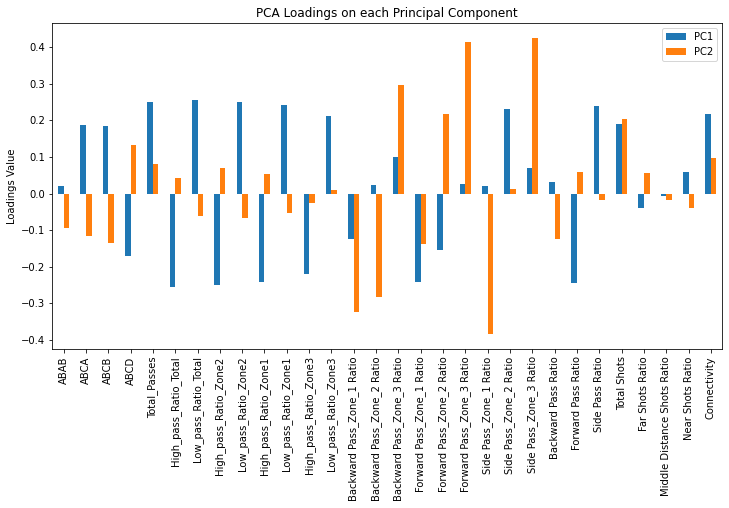

In [490]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

scaled_data = scaler.fit_transform(grouped_mean_df)

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create the scatter plot
plt.figure(figsize=(30, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, cmap='jet')

# Annotate each point with the team name
for i, team_name in enumerate(names):
    plt.annotate(team_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=15, alpha=0.75)

# Adding title and labels
plt.title('K-means Clustering with PCA-Reduced Data and Team Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the loadings (components)
loadings = pca.components_.T
feature_names = grouped_mean_df.columns

# Create a DataFrame of loadings with features
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)
print("Loadings:\n", loading_matrix)

# Optionally, plot the magnitude of each loading per principal component
loading_matrix.plot(kind='bar', figsize=(12, 6), title="PCA Loadings on each Principal Component")
plt.ylabel('Loadings Value')
plt.show()

In [491]:
df_with_clusters

,index,uniqueTeamId,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,...,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity,TeamID,KMeans_Labels,GMM_Labels,BKMeans_Labels,matchId,teamId
0,0,10531---2499726,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,...,0.250000,0.250000,0.500000,6.294872,10531---2499726,2,2,2,2499726,10531
1,1,10531---2499736,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,...,0.428571,0.571429,0.000000,6.659341,10531---2499736,2,2,2,2499736,10531
2,2,10531---2499741,0.022989,0.105747,0.105747,0.765517,438,0.146119,0.842466,0.130435,...,0.166667,0.333333,0.500000,6.472527,10531---2499741,2,2,2,2499741,10531
3,3,10531---2499757,0.027344,0.103516,0.101562,0.767578,515,0.149515,0.829126,0.113744,...,0.000000,0.625000,0.375000,7.153846,10531---2499757,2,2,2,2499757,10531
4,4,10531---2499766,0.032258,0.101382,0.105991,0.760369,220,0.240909,0.750000,0.134615,...,0.000000,0.666667,0.333333,5.285714,10531---2499766,1,1,0,2499766,10531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,3647,756---2565880,0.029213,0.110112,0.112360,0.748315,448,0.214286,0.765625,0.122449,...,0.210526,0.421053,0.368421,6.615385,756---2565880,2,2,0,2565880,756
3648,3648,756---2565892,0.036842,0.113158,0.105263,0.744737,383,0.177546,0.812010,0.112299,...,0.545455,0.272727,0.181818,7.362637,756---2565892,2,2,0,2565892,756
3649,3649,756---2565904,0.031496,0.089239,0.089239,0.790026,384,0.270833,0.713542,0.135338,...,0.000000,0.642857,0.357143,8.089744,756---2565904,1,1,0,2565904,756
3650,3650,756---2565908,0.053608,0.098969,0.107216,0.740206,488,0.180328,0.805328,0.128631,...,0.333333,0.500000,0.166667,7.153846,756---2565908,2,2,0,2565908,756


In [492]:
df_with_clusters.iloc[:, 1:33]

,uniqueTeamId,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,...,Side Pass_Zone_3 Ratio,Backward Pass Ratio,Forward Pass Ratio,Side Pass Ratio,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity,TeamID
0,10531---2499726,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,0.944785,...,0.081818,0.157576,0.339394,0.503030,4.0,0.250000,0.250000,0.500000,6.294872,10531---2499726
1,10531---2499736,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,0.909091,...,0.140704,0.155779,0.304020,0.540201,7.0,0.428571,0.571429,0.000000,6.659341,10531---2499736
2,10531---2499741,0.022989,0.105747,0.105747,0.765517,438,0.146119,0.842466,0.130435,0.853755,...,0.043379,0.155251,0.349315,0.495434,6.0,0.166667,0.333333,0.500000,6.472527,10531---2499741
3,10531---2499757,0.027344,0.103516,0.101562,0.767578,515,0.149515,0.829126,0.113744,0.867299,...,0.133981,0.163107,0.333981,0.502913,8.0,0.000000,0.625000,0.375000,7.153846,10531---2499757
4,10531---2499766,0.032258,0.101382,0.105991,0.760369,220,0.240909,0.750000,0.134615,0.846154,...,0.077273,0.168182,0.450000,0.381818,3.0,0.000000,0.666667,0.333333,5.285714,10531---2499766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,756---2565880,0.029213,0.110112,0.112360,0.748315,448,0.214286,0.765625,0.122449,0.867347,...,0.165179,0.138393,0.314732,0.546875,19.0,0.210526,0.421053,0.368421,6.615385,756---2565880
3648,756---2565892,0.036842,0.113158,0.105263,0.744737,383,0.177546,0.812010,0.112299,0.871658,...,0.125326,0.140992,0.352480,0.506527,11.0,0.545455,0.272727,0.181818,7.362637,756---2565892
3649,756---2565904,0.031496,0.089239,0.089239,0.790026,384,0.270833,0.713542,0.135338,0.849624,...,0.111979,0.179688,0.346354,0.473958,14.0,0.000000,0.642857,0.357143,8.089744,756---2565904
3650,756---2565908,0.053608,0.098969,0.107216,0.740206,488,0.180328,0.805328,0.128631,0.854772,...,0.131148,0.172131,0.331967,0.495902,12.0,0.333333,0.500000,0.166667,7.153846,756---2565908


In [499]:
df_with_clusters.iloc[:, 2:34]

,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,High_pass_Ratio_Zone1,...,Backward Pass Ratio,Forward Pass Ratio,Side Pass Ratio,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity,TeamID,KMeans_Labels
0,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,0.944785,0.198413,...,0.157576,0.339394,0.503030,4.0,0.250000,0.250000,0.500000,6.294872,10531---2499726,2
1,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,0.909091,0.192000,...,0.155779,0.304020,0.540201,7.0,0.428571,0.571429,0.000000,6.659341,10531---2499736,2
2,0.022989,0.105747,0.105747,0.765517,438,0.146119,0.842466,0.130435,0.853755,0.197080,...,0.155251,0.349315,0.495434,6.0,0.166667,0.333333,0.500000,6.472527,10531---2499741,2
3,0.027344,0.103516,0.101562,0.767578,515,0.149515,0.829126,0.113744,0.867299,0.139535,...,0.163107,0.333981,0.502913,8.0,0.000000,0.625000,0.375000,7.153846,10531---2499757,2
4,0.032258,0.101382,0.105991,0.760369,220,0.240909,0.750000,0.134615,0.846154,0.351648,...,0.168182,0.450000,0.381818,3.0,0.000000,0.666667,0.333333,5.285714,10531---2499766,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,0.029213,0.110112,0.112360,0.748315,448,0.214286,0.765625,0.122449,0.867347,0.204545,...,0.138393,0.314732,0.546875,19.0,0.210526,0.421053,0.368421,6.615385,756---2565880,2
3648,0.036842,0.113158,0.105263,0.744737,383,0.177546,0.812010,0.112299,0.871658,0.136752,...,0.140992,0.352480,0.506527,11.0,0.545455,0.272727,0.181818,7.362637,756---2565892,2
3649,0.031496,0.089239,0.089239,0.790026,384,0.270833,0.713542,0.135338,0.849624,0.301136,...,0.179688,0.346354,0.473958,14.0,0.000000,0.642857,0.357143,8.089744,756---2565904,1
3650,0.053608,0.098969,0.107216,0.740206,488,0.180328,0.805328,0.128631,0.854772,0.154412,...,0.172131,0.331967,0.495902,12.0,0.333333,0.500000,0.166667,7.153846,756---2565908,2


In [501]:
clustered_df_for_stats = pd.DataFrame(df_with_clusters.iloc[:, 2:34])

# List of columns to exclude from aggregation
cols_to_exclude = ['KMeans_Labels', 'TeamID']

# List of columns to include in the aggregation
cols_to_include = [col for col in clustered_df_for_stats.columns if col not in cols_to_exclude]

# Group by 'GMM_Labels' and calculate the mean and quantiles for each cluster
stats_per_cluster = clustered_df_for_stats.groupby('KMeans_Labels')[cols_to_include].agg('mean')
# Renaming the lambda functions for clarity in the output
#stats_per_cluster.columns = stats_per_cluster.columns.map('_'.join).str.replace('<lambda_0>', '25th_percentile').str.replace('<lambda_1>', '50th_percentile (median)').str.replace('<lambda_2>', '75th_percentile')

stats_per_cluster

,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,High_pass_Ratio_Zone1,...,Side Pass_Zone_2 Ratio,Side Pass_Zone_3 Ratio,Backward Pass Ratio,Forward Pass Ratio,Side Pass Ratio,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity
KMeans_Labels,,,,,,,,,,,,,,,,,,,,,
0,0.033554,0.095575,0.096004,0.774868,563.782004,0.107704,0.873630,0.067903,0.919995,0.125497,...,0.274457,0.147349,0.140615,0.312138,0.547247,14.292208,0.288547,0.447622,0.263831,8.085608
1,0.035094,0.085341,0.085914,0.793650,321.695958,0.210035,0.770163,0.134750,0.846696,0.291474,...,0.196790,0.130028,0.142891,0.402290,0.454819,9.835242,0.288222,0.453225,0.258553,6.947390
2,0.035218,0.097083,0.097866,0.769832,411.914345,0.145980,0.837067,0.091067,0.893705,0.192863,...,0.230583,0.110158,0.150115,0.348246,0.501639,9.673398,0.297026,0.433753,0.269222,7.376621


In [502]:
outcome_percentages

Match_Result                         Draw       Lose        Win
KMeans_Labels Opponent_Cluster                                 
0             0                 18.461538  40.769231  40.769231
              1                 23.167849  30.023641  46.808511
              2                 22.666667  26.666667  50.666667
1             0                 23.167849  46.808511  30.023641
              1                 34.806630  32.596685  32.596685
              2                 28.328612  37.677054  33.994334
2             0                 22.666667  50.666667  26.666667
              1                 28.328612  33.994334  37.677054
              2                 22.222222  38.888889  38.888889

In [357]:
outcome_percentages

Match_Result,Draw,Lose,Win
KMeans_Labels,,,
0,22.356215,29.684601,47.959184
1,28.471002,39.455185,32.073814
2,23.885794,41.991643,34.122563
